# Separación de componentes con redes neuronals 
En este lab la idea es que separéis una señal en las distintas componentes que la consituyen. El caso que estudiaremos es el cielo en el rango de las microondas. La señal que nos llega es una mezcla de fondo cósmico de microondas (CMB), radiación debida al polvo térmico interestelar, y la radiación sincrotrón debida a partículas atravesando el campo magnético de nuestra Galaxia. Cuanto mejor las caractericemos, mejor las podremos estudiar, tanto para análisis cosmológicos (CMB) o para el estudio de nuestra Galaxia (sincrotrón y polvo). Así la señal que recibimos es a cada frecuencia $\nu$ es: 
\begin{equation}
S_{\nu}=S_{cmb}+S_{synch}+S_{dust}+noise
\end{equation}

Conocemos el modelo de como se comportan frecuencialmente estas componentes por separado y se puede caracterizar por 4 parámteros: Amplitud del Cmb ($A_{cmb}$), Amplitud del syncrotron e índice espectral del sincrotrón ($A_{s}$) y ($\beta_s$) y el polvo térmico con su amplitud a 353GHz $A_{d}$. 

Os vamos a dar tres data sets. Cada uno de ellos tendrá la señal (en K) con todas las componentes mezcladas más una contribución de ruido (debida a la sensibilidad del detector, cantidad de tiempo observado, etc.) y los 4 parámetros de las componentes: $A_{cmb}$, $A_{d}$ y $A_s$ y $\beta_s$ (detalles en la presentación):
* PLANCK:  9 frecuencias del satélite PLANCK de la ESA (30, 44, 70, 100, 143, 217, 353, 545, 857 GHZ).
* PLANCK + HASLAM : Añadimos un canal a muy baja frecuencia (0.408 GHz).

Los data sets los encontraréis en: SET+'_Signal_dataset.txt' y SET+'_Signal_labels.txt'

Trabajaremos con `healpy`, la parte de cargar mapas y visualizarlos está en este notebook. Podéis instalarlo con `pip install healpy`


# Ejercicio 1
   Buscaremos el mejor modelo para cada uno de los datasets y lo validaremos con uns simulación de mapas realistas
   *   **1.1.** Encuentra con una red neuronal un bueno modelo que relacione los inputs con los parámetros de las componentes para cada uno de los data sets.   
   *   **1.2.** Evalúa con una simulación independiente como de buenos son tus resultados. 
   *   **1.3.** Comenta qué parametros mejoran cuando añadimos una frecuencia más (más baja) y porqué. 

**(7 puntos)**

In [1]:
# Packages needed
import numpy as np
import scipy.constants as cst
import matplotlib.pyplot as pl
import healpy as hp
cmap='coolwarm'
import keras 


Using TensorFlow backend.


In [2]:
# Data sets characteristics
def DataSet(FLAG):
    if FLAG=='PLANCK':
        freq=[30.,44.,70.,100.,143.,217.,353.,545.,857.]
        sigma=[2.8, 3.0, 4.0, 1.29, 0.55, 0.78, 2.56, 13.6, 100]
    if FLAG=='PLANCK+HASLAM':
        freq=[0.408,30.,44.,70.,100.,143.,217.,353.,545.,857.]
        sigma=[1E6,2.8, 3.0, 4.0, 1.29, 0.55, 0.78, 2.56, 13., 500]
    if FLAG=='PLANCK+HASLAM+QUIJOTE':
        freq=[0.408,11.,13.,17.,19.,30.,44.,70.,100.,143.,217.,353.,545.,857.]
        sigma=[1E6,10,10,10,10, 2.8, 3.0, 4.0, 1.29, 0.55, 0.78, 2.56, 13., 500]
    return freq,sigma

In [3]:
# Read data set
SET='PLANCK'  

freq,sigma=DataSet(SET) # cargamos num de frecuencias , std del ruido, y valor maximo del synchrotron
nu_ref=freq[0]  # frecuencia donde evaluamos el synchrotron

Signal=np.loadtxt(SET+'_Signal_dataset.txt')   # 10000 x len(freq)
Labels=np.loadtxt(SET+'_Signal_labels.txt')    # 10000 x 4 params (A_cmb,A_s,beta_s,A_d)

In [ ]:
# 1.1 Start obtaining your models with a NN




# Ejercicio 1.2 
Con una simulación realista (Datos/Data+SET+.fits) donde sabemos cada una de las componentes, comprueba tus resultados y comenta qué efecto tiene añadir frecuencias bajas a la estimación de tus parámetros. Visualizad los mapas que obtendríais con la red y los de verdad (Datos/Params+SET+.fits) y evaluad las diferencias. 

**(3 puntos)**

In [5]:
# Cargamos con healpy los datos simulados 
nmaps=np.arange(0,len(freq))
Datos=hp.read_map('Datos/Data'+SET+'.fits',nmaps,verbose=False,dtype=np.float64)

# Los parametros que se han usado para generar estos datos son: 
True_params=hp.read_map('Datos/Params'+SET+'.fits',(0,1,2,3),verbose=False,dtype=np.float64)      

# Accedemos a los mapas frecuenciales y los parametros se acceden con Datos[i], True_params[i]

/usr/local/lib/python3.7/site-packages/healpy/fitsfunc.py:352: UserWarning: If you are not specifying the input dtype and using the default np.float64 dtype of read_map(), please consider that it will change in a future version to None as to keep the same dtype of the input file: please explicitly set the dtype if it is important to you.
  "If you are not specifying the input dtype and using the default "


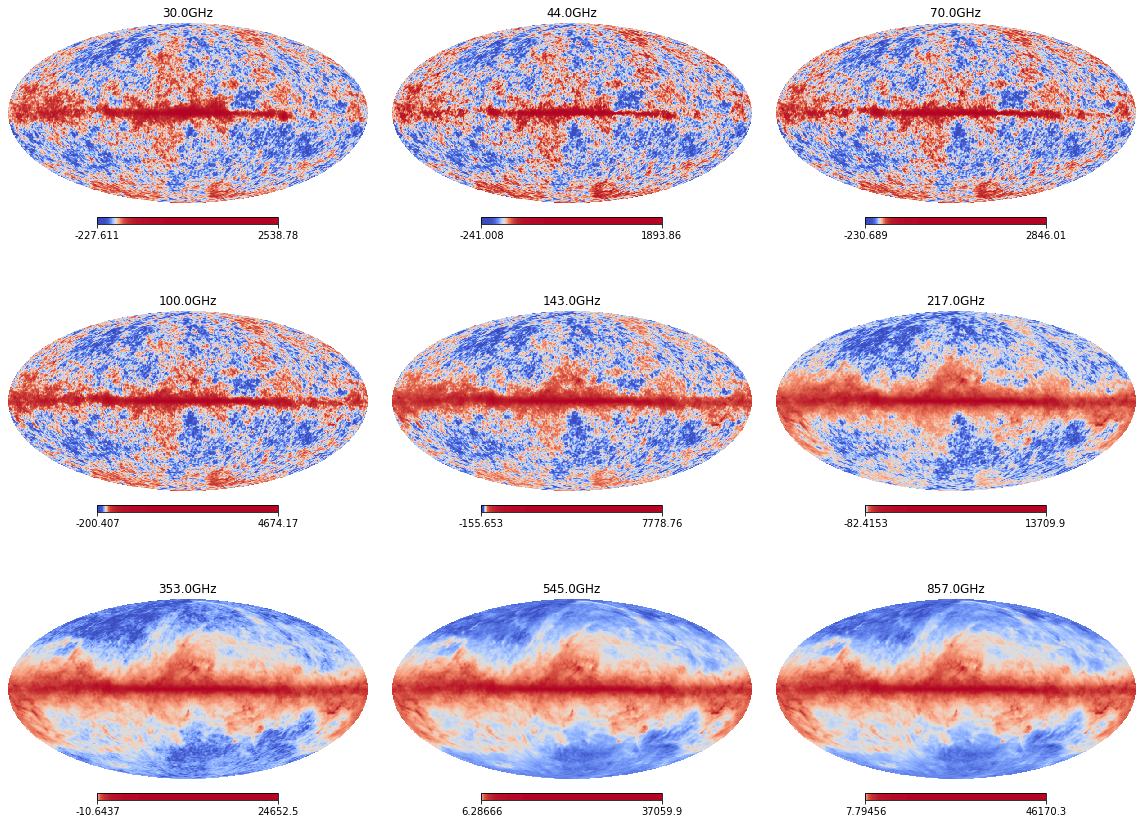

In [6]:
# Visualizamos los datos
pl.figure(0,figsize=(16,12))
if SET == 'PLANCK': n=3
if SET == 'PLANCK + HASLAM': n=4
if SET == 'PLANCK + HASLAM +QUIJOTE': n=5
for i in range(len(freq)):
    hp.mollview(Datos[i],sub=(n,3,i+1),norm='hist',title=str(freq[i])+'GHz',cmap=cmap)

In [ ]:
# 1.2 Make predictions with your models and compare results
# and make a quantitative evaluation of your prediction (ex. correlation coefficient, mse,...)


In [1]:
# Visualize the prediciton and input maps:

# Example first parameter: 
# Use hp.mollview to visualize the maps and their differences:
# hp.mollview(Params_pred[:,0],cmap=cmap,sub=(1,3,1),title=r'$a_{cmb}$'+' NN',norm='hist')
# hp.mollview(True_params[0],cmap=cmap,sub=(1,3,2),title=r'$a_{cmb}$'+' input',norm='hist')
# hp.mollview(Params_pred[:,0]-True_params[0],cmap=cmap,sub=(1,3,3),title='Difference')
   

In [ ]:
# 1.3  Comment what are the differences of both data sets


# Ejercicio 2. 
Para el caso PLANCK+HASLAM+QUIJOTE mandad vuestros resultados a la competición de Kaggle: https://www.kaggle.com/c/component-separation-with-nn. Podéis mandar tantos como queráis.

**(3 puntos)**